In [119]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import json

from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

In [120]:
dataDfDict ={}

with open('./cityTranslatedData.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)
for key in json_data.keys():
    for i in range(len(json_data[key]['datas'])):
        if json_data[key]['datas'][i] == "":
            json_data[key]['datas'][i] = json_data[key]['datas'][i-1]
    dataDfDict[key] = pd.DataFrame(json_data[key]['datas'], json_data[key]['labels'])

In [121]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
from pandas.io.parsers import read_csv

In [122]:
# data  = list(dataDfDict['서울특별시 강서구 공항동'][0])
mid_price = list(dataDfDict['서울특별시 강서구 공항동'][0])

day_divided = 50
day_length = day_divided + 1
day_result = []

for i in range(len(mid_price) - day_length):
    day_result.append(mid_price[i: i + day_length])

# print("전체 데이터 Length : ", len(data))
print("나눈 데이터 Length : ", len(day_result))
print("나눈 데이터 0번째 : ")
print(day_result[0])
print(day_result[1])

norm_result = []
for section in day_result:
    norm_section = [((float(p) / float(section[0])) - 1) for p in section]
    norm_result.append(norm_section)
day_result = np.array(norm_result)

print(day_result[0])

train_data_rate = 0.7
boundary = round(day_result.shape[0] * train_data_rate)
train_data = day_result[:boundary, :]
test_data = day_result[boundary:, :]

x_train = train_data[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train_data[:, -1]

x_test = test_data[:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = test_data[:, -1]

x_train.shape, x_test.shape

나눈 데이터 Length :  59
나눈 데이터 0번째 : 
[61.94539249146757, 61.94539249146757, 69.40380395025603, 41.505791505791514, 41.505791505791514, 50.03032140691328, 71.58351409978309, 71.60570365778054, 53.61071501324098, 72.301819702991, 72.301819702991, 50.19904689951764, 62.881097560975604, 67.75110549589388, 40.80118694362018, 40.80118694362018, 75.32467532467531, 75.32467532467531, 67.13519511744036, 64.0877598152425, 57.081807081807085, 62.73314203730273, 64.87778958554729, 64.87778958554729, 69.36734693877551, 59.18220946915352, 48.479381443298976, 63.87921022067364, 65.65857540787903, 63.368690563277255, 65.16832800451382, 56.552231208642056, 56.552231208642056, 56.552231208642056, 70.43940024989587, 63.849624060150376, 60.68524970963996, 66.78359417161359, 71.55247181266263, 63.87921022067364, 62.93814432989691, 42.2457937088515, 40.86687306501548, 55.55555555555555, 55.55555555555555, 55.55555555555555, 57.491289198606275, 41.87817258883249, 70.30481809242872, 57.24666142969365, 66.1860364

((41, 50, 1), (18, 50, 1))

In [123]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='sgd')

In [124]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_27 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20
    )

Epoch 1/20
5/5 [==============================] - 5s 250ms/step - loss: 0.0547 - val_loss: 0.2119
Epoch 2/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0556 - val_loss: 0.1980
Epoch 3/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0437 - val_loss: 0.2017
Epoch 4/20
5/5 [==============================] - 0s 34ms/step - loss: 0.0577 - val_loss: 0.1984
Epoch 5/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0548 - val_loss: 0.1872
Epoch 6/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0559 - val_loss: 0.1934
Epoch 7/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0503 - val_loss: 0.1840
Epoch 8/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0512 - val_loss: 0.1472
Epoch 9/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0450 - val_loss: 0.1504
Epoch 10/20
5/5 [==============================] - 0s 34ms/step - loss: 0.0493 - val_loss: 0.1613
Epoch 11/20
5/5 [===========

In [126]:
pred = model.predict(x_test)

C:\Python39\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


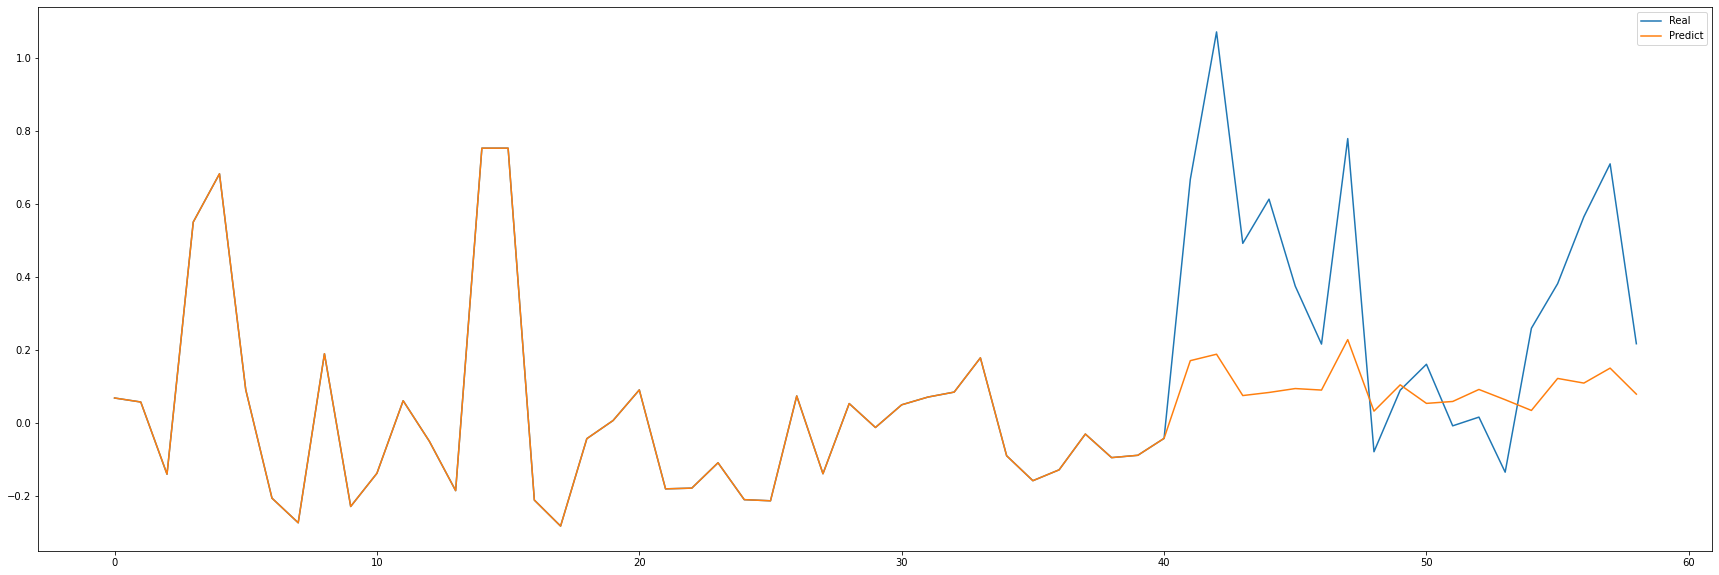

In [127]:
import matplotlib.pyplot as plt

plot_figure = plt.figure(figsize=(30, 10))
plot_rst = plot_figure.add_subplot(111)
plot_rst.plot((list(y_train) + list(y_test)), label='Real')
plot_rst.plot((list(y_train) + list(pred)), label='Predict')
plot_rst.legend()
plt.show()

In [ ]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()

model = Sequential() # Sequeatial Model
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature)
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])
